#Feature Names

age: Age of the patient

sex: Sex of the patient ~ 0 = Male , 1 = Female

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('F:\STUDY\XAI\HeartAttack Dataset\heart.csv')
df.drop_duplicates(keep='first',inplace=True)

print(df)

     age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0     63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1     37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2     41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3     56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4     57    0   0     120   354    0  ...     1      0.6    2    0      2       1
..   ...  ...  ..     ...   ...  ...  ...   ...      ...  ...  ...    ...     ...
298   57    0   0     140   241    0  ...     1      0.2    1    0      3       0
299   45    1   3     110   264    0  ...     0      1.2    1    0      3       0
300   68    1   0     144   193    1  ...     0      3.4    1    2      3       0
301   57    1   0     130   131    0  ...     1      1.2    1    1      3       0
302   57    0   1     130   236    0  ...     0      0.0    1    1      2       0

[302 rows x 14 

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up the data for modelling 
# define Y 
y=df['output'].to_frame() 
# define X df.columns.difference removes the specified column
X=df[df.columns.difference(['output'])] 
# create train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# build classifier
xgb_mod=xgb.XGBClassifier(random_state=101, gpu_id=0, use_label_encoder = False)

#values.ravel() compresses any array to 1D Array 
xgb_mod=xgb_mod.fit(X_train,y_train.values.ravel())   

#print(xgb_mod)

# make prediction and check model accuracy 
y_pred = xgb_mod.predict(X_test)

# Performance
#Actual Prediction Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[21:32:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.10%


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


EXPECTED VALUE : 0.26300174

Shap Values of 100th Observation :  [ 1.5226027  -2.4421504   0.4771345   2.2208881   0.11948246 -0.09461677
  0.06724504 -0.29110464 -0.50688887  0.6546203   0.32628733  0.8501843
  0.3537679 ]

Sum of Shap Values of 100th Observation :  3.257452018558979

F(x) = Sum of Shap Values + Expected Value =  3.257452018558979  +  0.26300174  =  3.5204537585377693


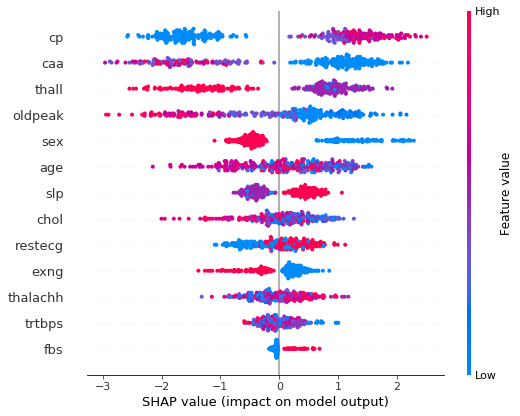

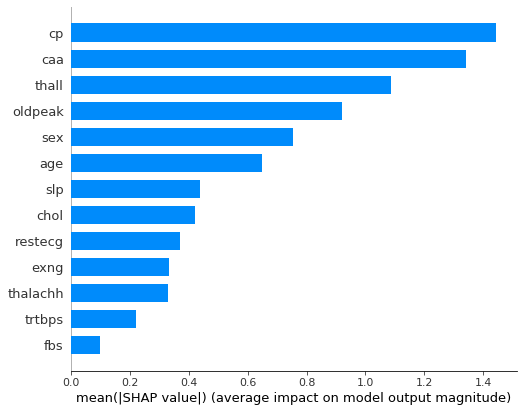

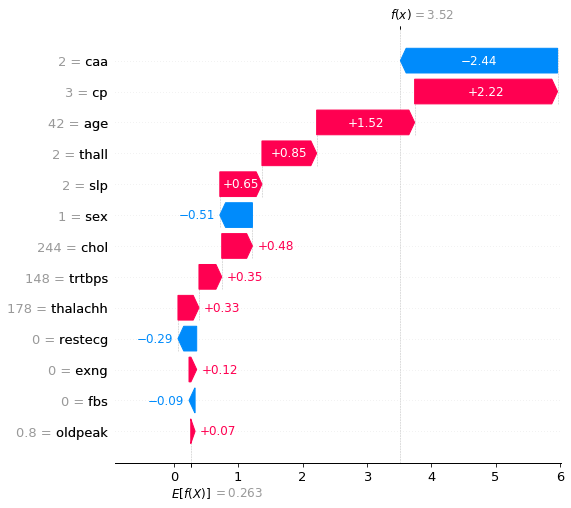

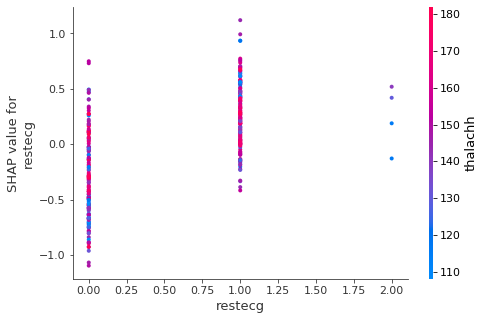

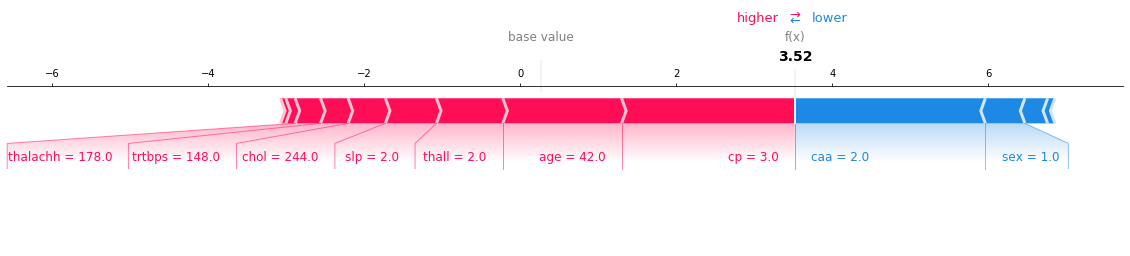

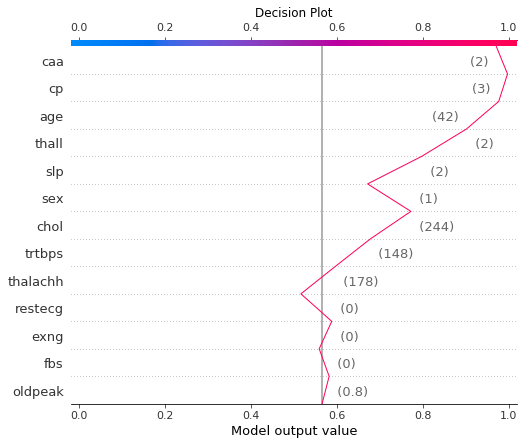

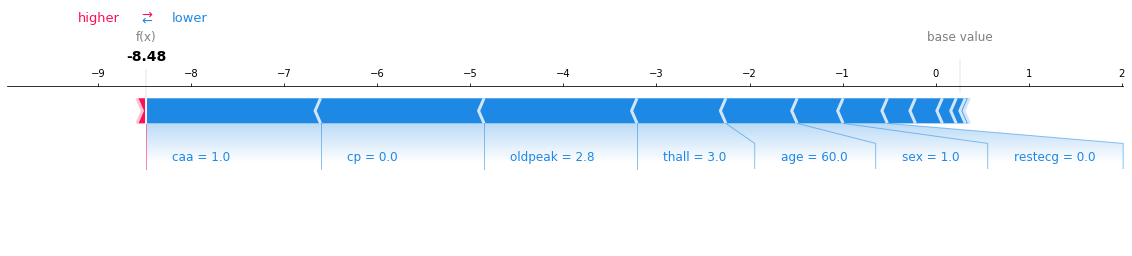

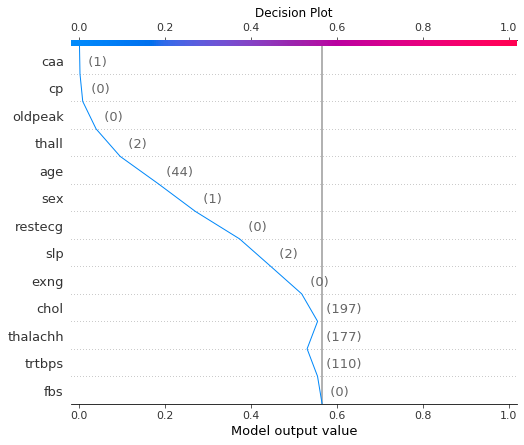

In [29]:
import shap

# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value



print("EXPECTED VALUE :", expected_value)
print()

#f(x)= shap_values[x]+expected_value
s=0
for i in shap_values[100]:
    s=s+i

print("Shap Values of 100th Observation : ", shap_values[100])
print()
print("Sum of Shap Values of 100th Observation : ", s)
print()
print("F(x) = Sum of Shap Values + Expected Value = " , s ," + " , expected_value, " = ", s+expected_value)
############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

shap.summary_plot(shap_values, X,plot_type="bar") 

# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[100], features=X.loc[100,:], feature_names=X.columns, max_display=15, show=True)

# Generate dependence plot
shap.dependence_plot("restecg", shap_values, X, interaction_index="thalachh")

# Generate summary bar plot 

# Generate force plot - Multiple rows 
shap.force_plot(explainer.expected_value, shap_values[:100,:], X.iloc[:100,:])

# Generate force plot - Single
shap.force_plot(explainer.expected_value, shap_values[100,:], X.iloc[100,:], matplotlib =True)


#shap_value[200] - Blue in decision Plot
#shap_value[100] - Red in decision Plot

shap.decision_plot(expected_value, shap_values[100],link='logit' ,features=X.loc[100,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

shap.force_plot(explainer.expected_value, shap_values[200,:], X.iloc[200,:], matplotlib =True)
shap.decision_plot(expected_value, shap_values[200],link='logit' ,features=X.loc[200,:], feature_names=(X.columns.tolist()),show=True,title="Decision Plot")

